In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from string import punctuation
import re
from global_values import *


# 文本数据处理

In [7]:
train_data = pd.read_csv(data_dir+'train_split_Depression_AVEC2017.csv')
dev_data = pd.read_csv(data_dir+'dev_split_Depression_AVEC2017.csv')
test_data = pd.read_csv(data_dir+'full_test_split.csv')

In [8]:
test_data.rename(columns = {"PHQ_Binary":"PHQ8_Binary"},inplace=True)

In [9]:
print(train_data.columns,end='\n')
print(dev_data.columns,end='\n')
print(test_data.columns,end='\n')
labels = pd.concat([train_data[['Participant_ID','PHQ8_Binary']],dev_data[['Participant_ID','PHQ8_Binary']],\
           test_data[['Participant_ID','PHQ8_Binary']]],axis=0)
labels.sort_values(by="Participant_ID")
labels.head()

Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender',
       'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired',
       'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving'],
      dtype='object')
Index(['Participant_ID', 'PHQ8_Binary', 'PHQ_Score', 'Gender'], dtype='object')


,Participant_ID,PHQ8_Binary
0,303,0
1,304,0
2,305,0
3,310,0
4,312,0


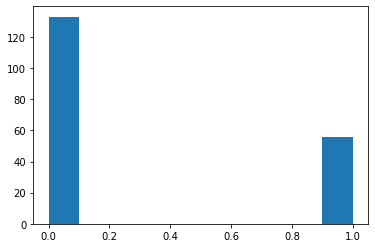

In [10]:
plt.hist(labels['PHQ8_Binary'])
plt.show()

In [11]:
text_files = [file for file in os.listdir(text_dir) if file.endswith('.csv')]
text_files[:5]
assert len(text_files)==189

In [12]:
text_files.sort()
PREFIX = [file[:3] for file in text_files]
text_files[:5]

['300_TRANSCRIPT.csv',
 '301_TRANSCRIPT.csv',
 '302_TRANSCRIPT.csv',
 '303_TRANSCRIPT.csv',
 '304_TRANSCRIPT.csv']

In [13]:
text_300 = pd.read_csv(text_dir+text_files[0],sep='\t')
text_300.head()

,start_time,stop_time,speaker,value
0,36.588,39.668,Ellie,hi i'm ellie thanks for coming in today
1,39.888,43.378,Ellie,i was created to talk to people in a safe and ...
2,43.728,48.498,Ellie,think of me as a friend i don't judge i can't ...
3,49.188,52.388,Ellie,i'm here to learn about people and would love ...
4,52.658,58.958,Ellie,i'll ask a few questions to get us started and...


In [14]:
". ".join(text_300[text_300['speaker']=="Participant"].value.tolist())

"good. atlanta georgia. um my parents are from here um. i love it. i like the weather. i like the opportunities. um. yes. um. it took a minute. somewhat easy. congestion. that's it. um i took up business and administration. uh yeah i am. here and there i'm on a break right now but i plan on going back in the uh next semester. uh probably to open up my own business. no. um no specific reason i just. don't travel a lot. i'm pretty local. once a year. can you be a little bit more specific. no answer. i like reading books i enjoy i enjoy cooking. um exercising is great. i'm i'm i'm pretty good at it. um. yeah. um probably about. two weeks ago. uh frustrated. um. i don't like bias. um i don't like um when someone says they're gonna do something and they don't. uh somewhat. friendship. i like to play sports i enjoy uh going out with friends and family. playing games. grandparents. parents. um yeah i mean they've always given me great advice. they've always kept it real. real close. i would s

In [15]:
with open(text_dir+'docs.txt','w') as f:
    for file in text_files:
        text = pd.read_csv(text_dir+file,sep='\t')
        if np.any(text.value.isnull()):
            text.value.fillna("",inplace=True)
        try:
            text = ". ".join(text[text['speaker']=="Participant"].value.tolist())
            f.write(text)
            f.write('\n')
        except:
            print(file)

In [4]:
with open(TEXT_DIR+"docs.txt",'r') as f:
    docs = "".join(f.readlines()).split('\n')
    docs = docs[:-1]
assert len(docs)==189

In [17]:
with open(text_dir+"labels.txt",'w') as f:
    for label in labels.PHQ8_Binary.tolist():
        f.write(str(label))
        f.write('\n')


In [5]:
with open(TEXT_DIR+"labels.txt",'r') as f:
    labels = "".join(f.readlines()).split('\n')
    labels = labels[:-1]
assert len(labels)==189

In [86]:
def Process_text(text):
    """预处理文本:
    - 分词
    - 去特殊符号
    """
    pattern = r"[!\"#$%&'()*+,-./:;<=>?@\[\]\\^_`{|}~]"
    text = re.sub(pattern,"",text)
    return text

In [87]:
with open(TEXT_DIR+'process_docs.txt','w') as f:
    for doc in docs:
        f.write(Process_text(doc))
        f.write('\n')

In [10]:
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from core.model.EmbeddingAverage import EmbedAvg
from collections import Counter
model = EmbedAvg(25000,100,1,0.5)

In [9]:
with open(TEXT_DIR+'process_docs.txt','r') as f:
    docs = "".join(f.readlines()).split('\n')
docs[0]

'good atlanta georgia um my parents are from here um i love it i like the weather i like the opportunities um yes um it took a minute somewhat easy congestion thats it um i took up business and administration uh yeah i am here and there im on a break right now but i plan on going back in the uh next semester uh probably to open up my own business no um no specific reason i just dont travel a lot im pretty local once a year can you be a little bit more specific no answer i like reading books i enjoy i enjoy cooking um exercising is great im im im pretty good at it um yeah um probably about two weeks ago uh frustrated um i dont like bias um i dont like um when someone says theyre gonna do something and they dont uh somewhat friendship i like to play sports i enjoy uh going out with friends and family playing games grandparents parents um yeah i mean theyve always given me great advice theyve always kept it real real close i would say going to college right after high school well i wouldv

In [12]:
words = [sentence.split() for sentence in docs]


In [16]:
allwords = Counter(" ".join(docs).split(' '))
len(allwords)

8611

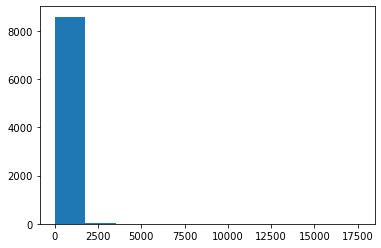

In [38]:
plt.hist(allwords.values())
plt.show()

In [50]:
allwords.most_common(8000)[-10:]

[('pitfalls', 1),
 ('drain', 1),
 ('awakeness', 1),
 ('hoover', 1),
 ('dam', 1),
 ('breathtaking', 1),
 ('stitch', 1),
 ('workload', 1),
 ('vocational', 1),
 ('des', 1)]

In [128]:
from core.model.WordAttention import WordAttention
from core.model.biLSTM_attention import BiLSTM_ATT
import torch.nn as nn
import torch
import torch.optim as optim
import torch.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, PackedSequence
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
import matplotlib.pyplot as plt
from global_values import *

sentences = torch.randint(0,20,(100,10)) # 100*10
labels = torch.randint(0,2,(100,)) #100*1
words_per_sentence = torch.randint(1,11,(100,))

val_sentences = torch.randint(0,20,(200,10))
val_labels = torch.randint(0,2,(200,))
val_words_per_sentence = torch.randint(1,11,(200,))

#model = WordAttention(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
model = BiLSTM_ATT(voc_size=20,emb_size=12,rnn_size=10,rnn_layers=2,att_size=8,bidirection=True,dropout=0.5)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.5)
model.to(device)

BiLSTM_ATT(
  (embedding): Embedding(20, 12)
  (lstm): LSTM(12, 10, num_layers=2, batch_first=True, bidirectional=True)
  (att): Linear(in_features=20, out_features=8, bias=True)
  (word_context_vector): Linear(in_features=8, out_features=1, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [137]:
temp_sentences = sentences
temp_labels = labels
temp_words = words_per_sentence

In [129]:
dataset = TensorDataset(sentences,words_per_sentence,labels)
train_data = DataLoader(dataset,batch_size=100,shuffle=True)

val_dataset = TensorDataset(val_sentences,val_words_per_sentence,val_labels)
val_data = DataLoader(val_dataset,batch_size=200,shuffle=True)

In [149]:
def acc_metrics(pre,y,threshold):
    pre = [0 if num<threshold else 1 for num in pre]
    #recall = recall_score(y,pre)
    #precision = precision_score(y,pre)
    #f1 = f1_score(y,pre)
    #accuracy = accuracy_score(y,pre)
    #metrics = [recall,precision,f1,accuracy]
    #return [round(metric,3) for metric in metrics] 
    cnt = 0
    positive = 0
    true_positive = 0
    pre_positive = 0
    for i in range(len(pre)):
        if pre[i]==y[i]:
            cnt+=1
        if y[i]==1:
            positive+=1
        if y[i]==1 and pre[i]==1:
            true_positive+=1
        if pre[i]==1:
            pre_positive+=1
            
    return cnt,len(pre),true_positive,positive,pre_positive

def Train(epoch,train_data,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    for i,(sentences,words_per_sentence,labels) in enumerate(train_data):
        model.train()
        sentences = sentences.to(device)
        words_per_sentence = words_per_sentence.to(device)
        labels = labels.to(device)
        pre = model(sentences,words_per_sentence)
        
        cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
        cnts+=cnt
        totals+= total
        true_positives+=true_positive
        positives+=positive
        pre_positives+=pre_positive
        
        loss = criterion(pre.squeeze(),labels.float())
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        Loss+=loss.item()
        print("Training epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                                    true_positives/positives,\
                                                                                                    true_positives/pre_positives))   
        if i%100==0:
            val_loss = Evaluate(model,val_data)
            if len(val_losses)==0 or val_loss<min(val_losses):
                print("best model, Val loss:{:.5f}".format(val_loss))
                torch.save(model.state_dict(),"./result/biLSTM_att-best.th")
            else:
                scheduler.step()
            val_losses.append(val_loss)
            
            
def Evaluate(model,val_data):
    Loss = 0
    cnts = 0
    totals = 0
    true_positives = 0 
    positives = 0
    pre_positives = 0
    model.eval()
    with torch.no_grad():
        for i,(sentences,words_per_sentence,labels) in enumerate(val_data):
            sentences = sentences.to(device)
            words_per_sentence = words_per_sentence.to(device)
            labels = labels.to(device)
            pre = model(sentences,words_per_sentence)

            cnt,total,true_positive,positive,pre_positive = acc_metrics(pre.squeeze(),labels.float(),threshold=0.5)
            cnts+=cnt
            totals+= total
            true_positives+=true_positive
            positives+=positive
            pre_positives+=pre_positive
            loss = criterion(pre.squeeze(),labels.float())
            Loss+=loss.item()
        
        print("Validation epoch: {} Loss: {:.5f} ACC: {:.2%} Recall: {:.2%} Precision: {:.2%}".format(epoch,Loss,cnts/totals,\
                                                                                      true_positives/positives,\
                                                                                        true_positives/pre_positives))
    return Loss

In [150]:
val_losses = []
for epoch in range(100):
    Train(epoch,train_data,val_data)

Training epoch: 0 Loss: 0.00069 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 0 Loss: 5.32340 ACC: 48.00% Recall: 60.64% Precision: 45.97%
best model, Val loss:5.32340
Training epoch: 1 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 1 Loss: 5.32926 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 2 Loss: 0.00029 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 2 Loss: 5.33066 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 3 Loss: 0.00097 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 3 Loss: 5.33188 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 4 Loss: 0.00042 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 4 Loss: 5.33219 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 5 Loss: 0.00062 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 5 Loss: 5.33233 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 6

Training epoch: 53 Loss: 0.00052 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 53 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 54 Loss: 0.00047 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 54 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 55 Loss: 0.00151 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 55 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 56 Loss: 0.00090 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 56 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 57 Loss: 0.00092 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 57 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 58 Loss: 0.00023 ACC: 100.00% Recall: 100.00% Precision: 100.00%
Validation epoch: 58 Loss: 5.33242 ACC: 48.00% Recall: 60.64% Precision: 45.97%
Training epoch: 59 Loss: 0.00066 A

In [134]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.01
    lr: 0.01
    weight_decay: 0
)

In [139]:
model.eval()
pre = model(temp_sentences,temp_words).squeeze()
pre = [1 if num>0.5 else 0 for num in pre]


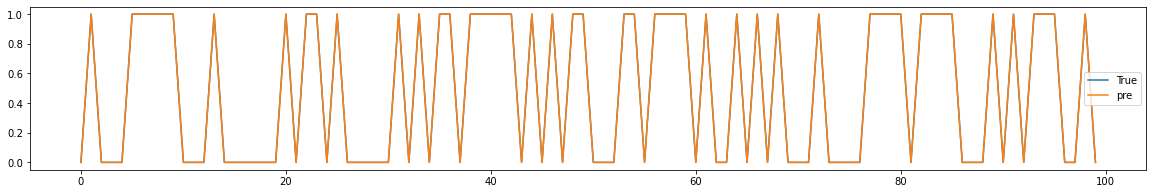

In [141]:
plt.figure(figsize=(20, 3))
plt.plot(range(100),temp_labels,label ="True")
plt.plot(range(100),pre,label ="pre")
plt.legend()
plt.show()

In [82]:
10000*0.01

100.0